In [3]:
import torch
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl

device = "cuda" if torch.cuda.is_available() else "cpu"

sns.set_style("whitegrid")
mpl.rc("font", size=13)

sys.path.append("../src")
sys.path.append("../data")

from train import DiffractionCNN

In [4]:
model_checkpoint = DiffractionCNN()
model_checkpoint.to(device)

model_checkpoint.load_state_dict(
    torch.load(
        f"../data/checkpoint.pt",
        map_location=device,
        weights_only=True,
    )["model_state_dict"]
)

<All keys matched successfully>

In [5]:
model_checkpoint.eval()

DiffractionCNN(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

### Loss

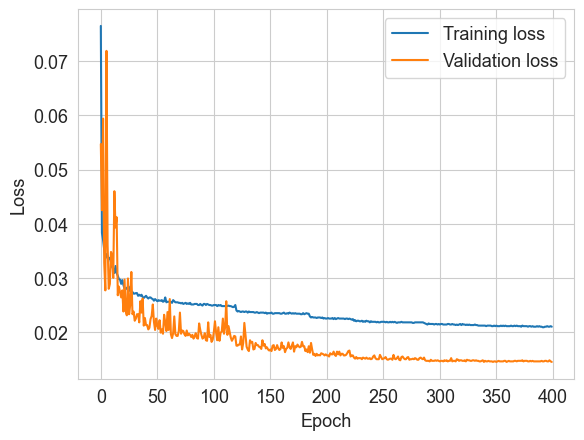

In [6]:
loss_df = pd.read_csv("../data/loss.csv")

plt.figure()
plt.plot(loss_df["train_loss"].to_numpy(), label="Training loss")
plt.plot(loss_df["val_loss"].to_numpy(), label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Prediction accuracy

Training set

In [7]:
y_pred_dict = torch.load(
    f"../data/y_pred_dict.pt",
    weights_only=True,
    map_location=device,
)

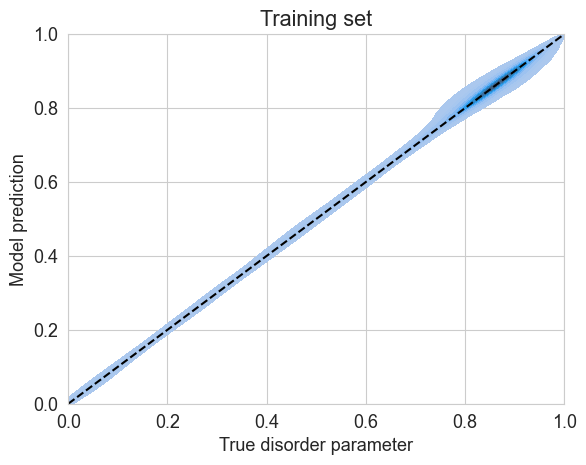

In [8]:
pred_df = pd.DataFrame(
    {
        "y_true": 1 - y_pred_dict["y_true_train"].view(-1).cpu(),
        "y_pred": 1 - y_pred_dict["y_pred_train"].view(-1).cpu(),
    }
)
pred_df = pred_df.sort_values("y_true")
plt.figure()
sns.kdeplot(pred_df, x="y_true", y="y_pred", fill=True)
true_pred_line = np.array([0, 1])
plt.plot(true_pred_line, true_pred_line, linestyle="dashed", c="black")
plt.xlim(true_pred_line[0], true_pred_line[1])
plt.ylim(true_pred_line[0], true_pred_line[1])
plt.xlabel("True disorder parameter")
plt.ylabel("Model prediction")
plt.title("Training set")
plt.show()

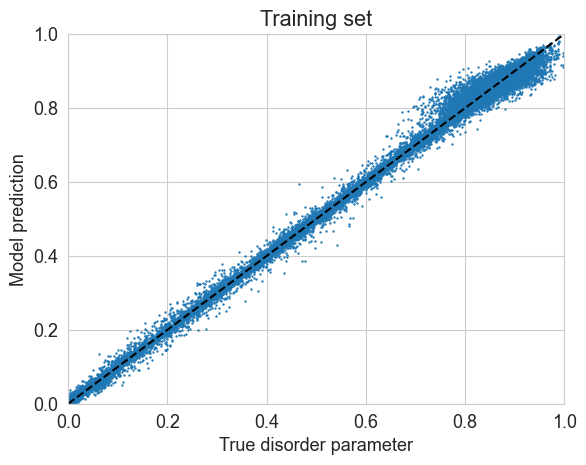

In [10]:
pred_df = pd.DataFrame(
    {
        "y_true": 1 - y_pred_dict["y_true_train"].view(-1).cpu(),
        "y_pred": 1 - y_pred_dict["y_pred_train"].view(-1).cpu(),
    }
)
pred_df = pred_df.sort_values("y_true")
plt.figure()
plt.scatter(pred_df["y_true"], pred_df["y_pred"], s=0.5, c="tab:blue")
true_pred_line = np.array([0, 1])
plt.plot(true_pred_line, true_pred_line, linestyle="dashed", c="black")
plt.xlim(true_pred_line[0], true_pred_line[1])
plt.ylim(true_pred_line[0], true_pred_line[1])
plt.xlabel("True disorder parameter")
plt.ylabel("Model prediction")
plt.title("Training set")
plt.show()

Validation set

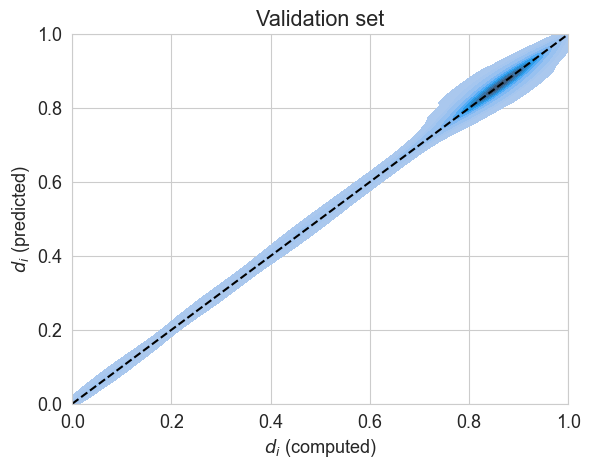

In [11]:
pred_df = pd.DataFrame(
    {
        "y_true": 1 - y_pred_dict["y_true_val"].view(-1).cpu(),
        "y_pred": 1 - y_pred_dict["y_pred_val"].view(-1).cpu(),
    }
)
pred_df = pred_df.sort_values("y_true")
plt.figure()
sns.kdeplot(pred_df, x="y_true", y="y_pred", fill=True)
true_pred_line = np.array([0, 1])
plt.plot(true_pred_line, true_pred_line, linestyle="dashed", c="black")
plt.xlim(true_pred_line[0], true_pred_line[1])
plt.ylim(true_pred_line[0], true_pred_line[1])
plt.xlabel("$d_i$ (computed)")
plt.ylabel("$d_i$ (predicted)")
plt.title("Validation set")
plt.show()

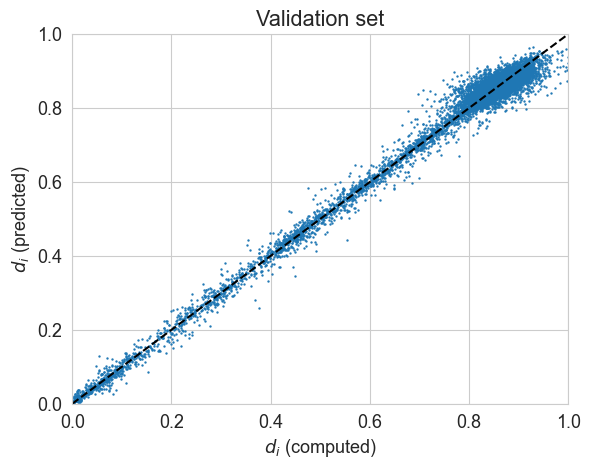

In [14]:
pred_df = pd.DataFrame(
    {
        "y_true": 1 - y_pred_dict["y_true_val"].view(-1).cpu(),
        "y_pred": 1 - y_pred_dict["y_pred_val"].view(-1).cpu(),
    }
)
pred_df = pred_df.sort_values("y_true")
plt.figure()
plt.scatter(pred_df["y_true"], pred_df["y_pred"], s=0.5)
true_pred_line = np.array([0, 1])
plt.plot(true_pred_line, true_pred_line, linestyle="dashed", c="black")
plt.xlim(true_pred_line[0], true_pred_line[1])
plt.ylim(true_pred_line[0], true_pred_line[1])
plt.xlabel("$d_i$ (computed)")
plt.ylabel("$d_i$ (predicted)")
plt.title("Validation set")
plt.show()